# **Recommend A Book**

In [0]:
# Load Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# Load dataset
users = pd.read_csv('BX-Users.csv', sep =';', encoding="latin-1") # contains information about users : user ID , Location and age
books = pd.read_csv('BX-Books.csv', sep =';', encoding="latin-1", error_bad_lines=False) # contains information about books : ISBN number, book name
ratings = pd.read_csv('BX-Book-Ratings.csv', sep =';', encoding="latin-1") # contains information about raing of books

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:27

In [16]:
#size of datasets
print(f'Users: {len(users)}\nBooks: {len(books)}\nRatings: {len(ratings)}')

Users: 278858
Books: 271360
Ratings: 1149780


In [17]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### **EDA**

In [18]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [19]:
# we see that we don't need the Image url columns so we need to drop them
books.drop(['Image-URL-S','Image-URL-M','Image-URL-L'], axis=1, inplace=True)
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [20]:
ratings.head()
# 0 is used for implicit rating as well as 1-10 is used for rating based on the appreciation for the book explicitly

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [21]:
# checking the data types 
ratings.dtypes

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

In [22]:
users.dtypes

User-ID       int64
Location     object
Age         float64
dtype: object

In [23]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
dtype: object

In [24]:
# diving into the user data frame !!
print('Number of unique users: ', users['User-ID'].nunique())
print('Count of all users: ', users['User-ID'].count())

Number of unique users:  278858
Count of all users:  278858


In [25]:
users.Age.isnull().sum()

110762

In [26]:
users.Age.unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [27]:
# there are many age which are as zero and NaN and also more than 100 so we need to make them NAN too
users.loc[(users.Age<5) | (users.Age>100), 'Age'] = np.nan
users.Age.unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,  56.,
        67.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,  12.,  74.,
        75.,  76.,  83.,  68.,  11.,  77.,  70.,  93.,   8.,   7.,  81.,
        10.,   5.,   6.,  96.,  84.,  82.,  90.,  91.,  94.,  85.,  97.,
        86.,  92.,  87., 100.,  95.,  89.,  99.,  88.,  98.])

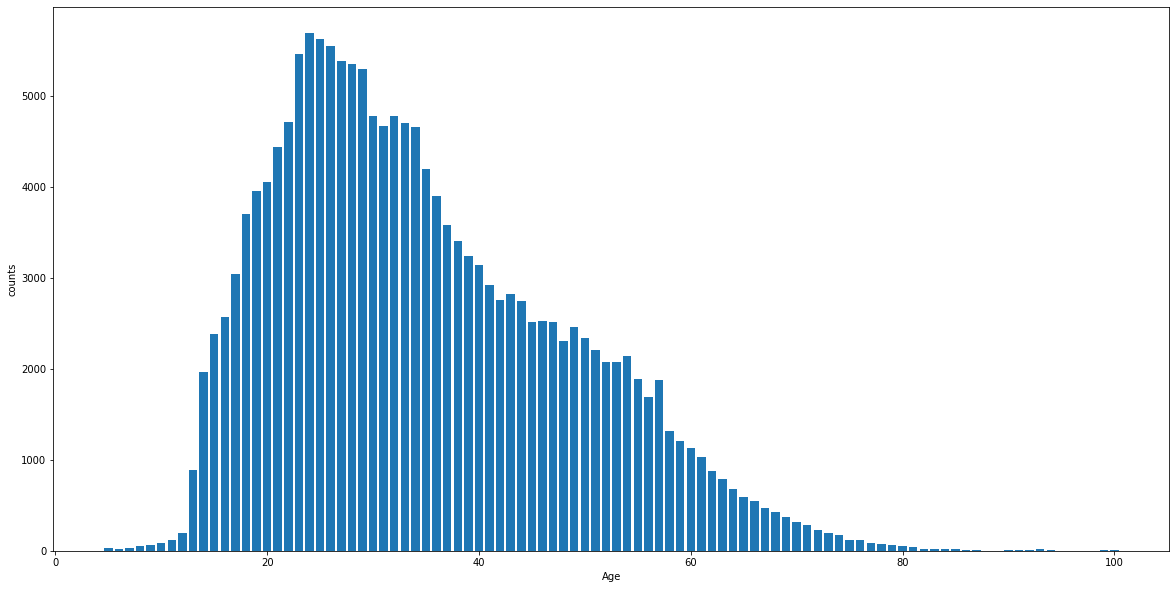

In [28]:
# to get a more insight about the users of the books we need a plot of the age of user
u = users.Age.value_counts().sort_index()
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 10}) # Set larger plot font size
plt.bar(u.index, u.values)
plt.xlabel('Age')
plt.ylabel('counts')
plt.show()

In [29]:
users.Age.isnull().sum()

112010

In [0]:
users.Age = users.Age.fillna(users.Age.mean())
users.Age = users.Age.astype(np.int32)

In [31]:
users.Age.unique() # here we have filled the Nan values.

array([ 34,  18,  17,  61,  26,  14,  25,  19,  46,  55,  32,  24,  20,
        23,  51,  31,  21,  44,  30,  57,  43,  37,  41,  54,  42,  50,
        39,  53,  47,  36,  28,  35,  13,  58,  49,  38,  45,  62,  63,
        27,  33,  29,  66,  40,  15,  60,  79,  22,  16,  65,  59,  48,
        72,  56,  67,  80,  52,  69,  71,  73,  78,   9,  64,  12,  74,
        75,  76,  83,  68,  11,  77,  70,  93,   8,   7,  81,  10,   5,
         6,  96,  84,  82,  90,  91,  94,  85,  97,  86,  92,  87, 100,
        95,  89,  99,  88,  98])

In [32]:
# going through the location column
Locations = users.Location.str.split(',', 2, expand=True)
Locations.columns = ['city', 'state', 'country']
users = users.join(Locations)
users.drop(columns=['Location'], inplace=True)
users.head()

,User-ID,Age,city,state,country
0,1,34,nyc,new york,usa
1,2,18,stockton,california,usa
2,3,34,moscow,yukon territory,russia
3,4,17,porto,v.n.gaia,portugal
4,5,34,farnborough,hants,united kingdom


In [33]:
users.country.value_counts()
# diversification of users in different countries we see a null country here

 usa                                  139183
 canada                                21556
 united kingdom                        18286
 germany                               17021
 spain                                 13088
                                       ...  
 usa, kansas, usa                          1
, england, united kingdom                  1
 saint vincent and the grenadines"         1
 venezuela"                                1
 distrito federal                          1
Name: country, Length: 1276, dtype: int64

In [34]:
users.country.isnull().sum()
# only 2 NaN values as shown below

2

In [0]:
users.country.replace('', np.nan, inplace=True)

In [36]:
users.country.isnull().sum()
# all 4561 changed to NAN 

4563

 **Rating Dataframe**

In [37]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [0]:
# there are more rating than the number of users also implicit and explicit based rating is also been used here

In [39]:
rating_new = ratings[ratings.ISBN.isin(books.ISBN)]
rating_new.shape

(1031136, 3)

In [40]:
rating_new2 = ratings[ratings['User-ID'].isin(users['User-ID'])]
rating_new2.shape

(1149780, 3)

In [0]:
# no new user is added

In [0]:
rating_explicit = rating_new[rating_new['Book-Rating']!=0]
rating_implicit = rating_new[rating_new['Book-Rating']==0]

In [43]:
print(rating_implicit.shape)
print(rating_explicit.shape)

(647294, 3)
(383842, 3)


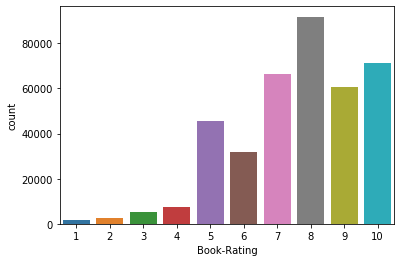

In [44]:
#plotting count of bookRating
import seaborn as sns
sns.countplot(data=rating_explicit , x='Book-Rating')
plt.show()
#It can be seen that higher ratings are more common amongst users and rating 8 has been rated highest number of times

  **books data frame**

In [0]:
books.head()
pd.set_option('display.max_colwidth', -1)

In [46]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
dtype: object

In [0]:
# the year of publication should either be int or float type

In [48]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [49]:
# the DK publishing INC and Gallimard must be removed.
books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [0]:
# correcting the data
# #ISBN '0789466953'
books.loc[books.ISBN == '0789466953','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '0789466953','Book-Author'] = "James Buckley"
books.loc[books.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

In [0]:
#ISBN '078946697X'
books.loc[books.ISBN == '078946697X','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

In [52]:
books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X'),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)",Michael Teitelbaum,2000,DK Publishing Inc
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)",James Buckley,2000,DK Publishing Inc


In [53]:
books.loc[books['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


In [0]:
books.loc[books.ISBN == '2070426769','Year-Of-Publication'] = 2003
books.loc[books.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN == '2070426769','Publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"

In [55]:
books.loc[books.ISBN == '2070426769',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard


In [0]:
books['Year-Of-Publication']=pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

In [57]:
sorted(books['Year-Of-Publication'].unique())

[0,
 1376,
 1378,
 1806,
 1897,
 1900,
 1901,
 1902,
 1904,
 1906,
 1908,
 1909,
 1910,
 1911,
 1914,
 1917,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2008,
 2010,
 2011,
 2012,
 2020,
 2021,
 2024,
 2026,
 2030,
 2037,
 2038,
 2050]

In [0]:
# since the book was published in 2004 taking 2 years as surplus 
books.loc[(books['Year-Of-Publication'] > 2006),'Year-Of-Publication'] = np.NAN

In [0]:
books.loc[(books['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

In [60]:
books['Year-Of-Publication'].isnull().sum()

4641

In [0]:
books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].mean()), inplace=True)

In [0]:
books['Year-Of-Publication'].isnull().sum()
#resetting the dtype as int32
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(np.int32)

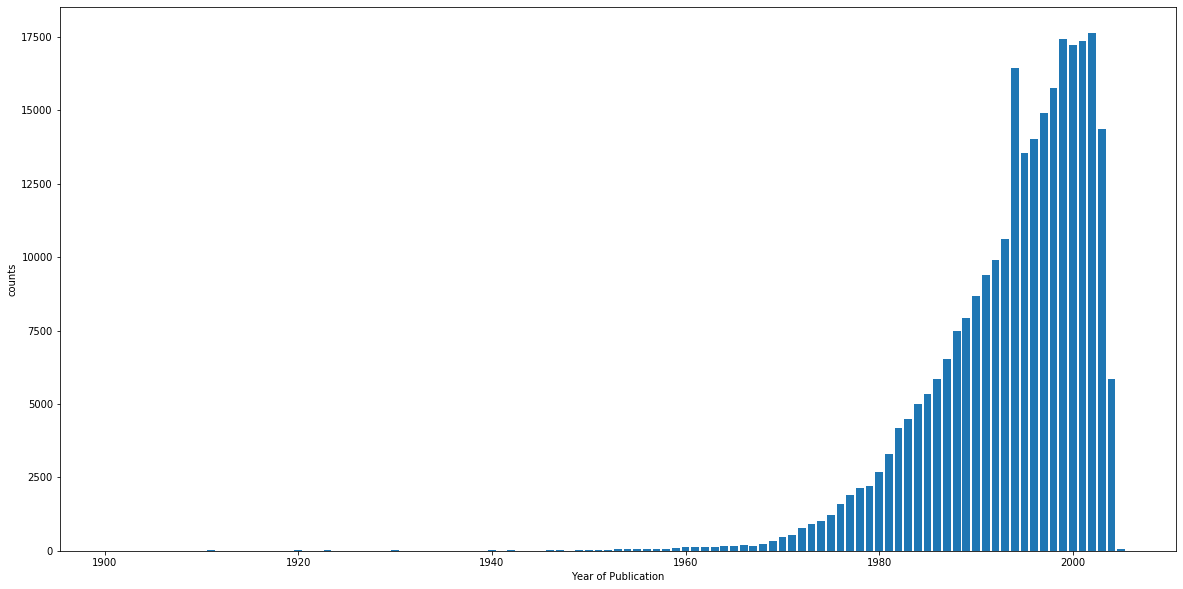

In [63]:
year =books['Year-Of-Publication'].value_counts().sort_index()
year = year.where(year>5) 
# remove count less than 5
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 10})
# Set larger plot font size
plt.bar(year.index, year.values)
plt.xlabel('Year of Publication')
plt.ylabel('counts')
plt.show()

In [64]:
#exploring 'publisher' column
books.loc[books['Publisher'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [0]:
# two NAN values we replace them by others 
books.loc[(books.ISBN == '193169656X'),'Publisher'] = 'other'
books.loc[(books.ISBN == '1931696993'),'Publisher'] = 'other'

In [66]:
books.loc[books['Publisher'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher


In [67]:
# TOP PUBLISHERS
books['Publisher'].value_counts()[:10]

Harlequin                   7535
Silhouette                  4220
Pocket                      3905
Ballantine Books            3783
Bantam Books                3646
Scholastic                  3160
Simon &amp; Schuster        2971
Penguin Books               2844
Berkley Publishing Group    2771
Warner Books                2727
Name: Publisher, dtype: int64

In [68]:
# TOP BOOKS
books['Book-Title'].value_counts()[:10]

Selected Poems                    27
Little Women                      24
Wuthering Heights                 21
Dracula                           20
Adventures of Huckleberry Finn    20
The Secret Garden                 20
Jane Eyre                         19
The Night Before Christmas        18
Pride and Prejudice               18
Great Expectations                17
Name: Book-Title, dtype: int64

In [69]:
# TOP AUTHORS
books['Book-Author'].value_counts()[:10]

Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        372
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: Book-Author, dtype: int64

**Recommendation Sytem**

1.Popularity based Recommendation

In [70]:
# A simple popularity based recommendation system can be built based on count of user ratings for different books
ratings_count = pd.DataFrame(rating_explicit.groupby(['ISBN'])['Book-Rating'].sum())
top10 = ratings_count.sort_values('Book-Rating', ascending = False).head(10)
# print "Following books are recommended"
top10.merge(books, left_index = True, right_on = 'ISBN')

,Book-Rating,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
408,5787,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
748,4108,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
522,3134,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
2143,2798,059035342X,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),J. K. Rowling,1999,Arthur A. Levine Books
356,2595,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
26,2551,0971880107,Wild Animus,Rich Shapero,2004,Too Far
1105,2524,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
706,2402,0446672211,Where the Heart Is (Oprah's Book Club (Paperback)),Billie Letts,1998,Warner Books
231,2219,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books
118,2179,0671027360,Angels &amp; Demons,Dan Brown,2001,Pocket Star


2. Collaborative Filtering Recommendation

In [71]:
# unify the books and ratings tables
books_ratings= rating_explicit.join(books.set_index('ISBN'), on='ISBN')
books_ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge English Readers),Sue Leather,2001,Cambridge University Press
8,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday
16,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch


In [72]:
print(f'Books table size: {len(books)}')
print(f'Ratings table size: {len(rating_explicit)}')
# books_with_ratings = book_ratings.join(books.set_index('isbn'), on='isbn')
print(f'New table size: {len(books_ratings)}')

Books table size: 271360
Ratings table size: 383842
New table size: 383842


In [73]:
# books with no title
books_ratings['Book-Title'].isnull().sum()

0

In [74]:
# among all those books which received atleastt 10 rating what are the top 10 books with highest average ratings
cutoff = books_ratings['Book-Title'].value_counts()
meanrating = books_ratings[books_ratings['Book-Title'].isin(cutoff[cutoff>10].index)].groupby('Book-Title')['Book-Rating'].mean()
meanrating.sort_values(ascending=False)[:10] # show only top 10

Book-Title
Postmarked Yesteryear: 30 Rare Holiday Postcards             10.000000
Dilbert: A Book of Postcards                                 9.923077 
Harry Potter and the Chamber of Secrets Postcard Book        9.869565 
Route 66 Postcards: Greetings from the Mother Road           9.727273 
The Return of the King (The Lord of The Rings, Part 3)       9.625000 
The Authoritative Calvin and Hobbes (Calvin and Hobbes)      9.600000 
Fox in Socks (I Can Read It All by Myself Beginner Books)    9.600000 
Calvin and Hobbes                                            9.583333 
My Sister's Keeper : A Novel (Picoult, Jodi)                 9.545455 
52 Deck Series: 52 Ways to Celebrate Friendship              9.500000 
Name: Book-Rating, dtype: float64

In [75]:
meanrating.sort_values(ascending=False)[-10:] # bottom 10 only

Book-Title
Four Blondes                                                                                                               5.393939
Confessions of a Sociopathic Social Climber : The Katya Livingston Chronicles (Katya Livingston Chronicles (Hardcover))    5.250000
Hotel World                                                                                                                5.250000
Sex and the City                                                                                                           5.214286
Neue Leiden Des Jungen                                                                                                     5.181818
Killing Time: A Novel of the Future                                                                                        5.066667
Coal: A Human History                                                                                                      4.947368
The Sexual Life of Catherine M.                                  

In [0]:
# join the users table on the user ID field

In [77]:
print(f'Books+Ratings table size: {len(books_ratings)}')
print(f'Users table size: {len(users)}')
books_users_ratings = books_ratings.join(users.set_index('User-ID'), on='User-ID')
print(f'New "books_users_ratings" table size: {len(books_users_ratings)}')

Books+Ratings table size: 383842
Users table size: 278858
New "books_users_ratings" table size: 383842


In [78]:
books_users_ratings.head(10)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age,city,state,country
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,34,seattle,washington,usa
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,16,rijeka,n/a,croatia
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge English Readers),Sue Leather,2001,Cambridge University Press,16,rijeka,n/a,croatia
8,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,34,torrance,california,usa
16,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch,25,iowa city,iowa,usa
19,276747,0671537458,9,Waiting to Exhale,Terry McMillan,1995,Pocket,25,iowa city,iowa,usa
20,276747,0679776818,8,Birdsong: A Novel of Love and War,Sebastian Faulks,1997,Vintage Books USA,25,iowa city,iowa,usa
21,276747,0943066433,7,How to Deal With Difficult People,Rick Brinkman,1995,Careertrack Inc.,25,iowa city,iowa,usa
23,276747,1885408226,7,The Golden Rule of Schmoozing,Aye Jaye,1998,Listen &amp; Live Audio,25,iowa city,iowa,usa
24,276748,0747558167,6,Apricots on the Nile: A Memoir with Recipes,Colette Rossant,2002,Bloomsbury Publishing Plc,39,jubail ind.-city,eastern province,saudi arabia


In [79]:
books_users_ratings.shape

(383842, 11)

In [80]:
user_item_rating = books_users_ratings[['User-ID', 'ISBN', 'Book-Rating']]
user_item_rating.head()

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9


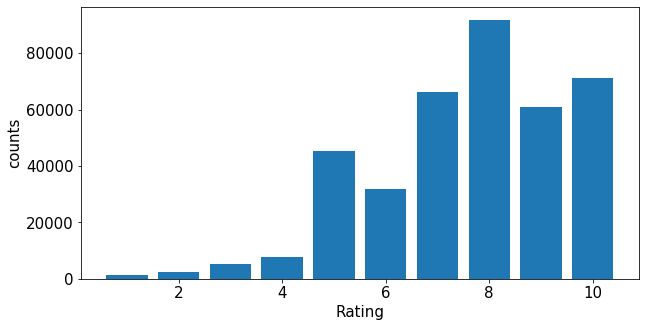

In [81]:
rating = user_item_rating['Book-Rating'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 15})
plt.bar(rating.index, rating.values)
plt.xlabel('Rating')
plt.ylabel('counts')
plt.show()

In [0]:
# generating training and test sets
from sklearn import model_selection
train_data, test_data = model_selection.train_test_split(user_item_rating, test_size=0.20)

In [0]:
# Map the user-ID and unique-ISBN fields to sequential integers for matrix processing

In [0]:
### TRAINING SET
# Get int mapping for user_id
u_unique_train = train_data['User-ID'].unique()  # create a 'set' (i.e. all unique) list of vals
train_data_user2idx = {o:i for i, o in enumerate(u_unique_train)}
# Get int mapping for unique_isbn
b_unique_train = train_data['ISBN'].unique()  # create a 'set' (i.e. all unique) list of vals
train_data_book2idx = {o:i for i, o in enumerate(b_unique_train)}

### TESTING SET
# Get int mapping for user_id
u_unique_test = test_data['User-ID'].unique()  # create a 'set' (i.e. all unique) list of vals
test_data_user2idx = {o:i for i, o in enumerate(u_unique_test)}
# Get int mapping for unique_isbn
b_unique_test = test_data['ISBN'].unique()  # create a 'set' (i.e. all unique) list of vals
test_data_book2idx = {o:i for i, o in enumerate(b_unique_test)}

In [85]:
### TRAINING SET
train_data['u_unique'] = train_data['User-ID'].map(train_data_user2idx)
train_data['b_unique'] = train_data['ISBN'].map(train_data_book2idx)

### TESTING SET
test_data['u_unique'] = test_data['User-ID'].map(test_data_user2idx)
test_data['b_unique'] = test_data['ISBN'].map(test_data_book2idx)

### Convert back to 3-column df
train_data = train_data[['u_unique', 'b_unique', 'Book-Rating']]
test_data = test_data[['u_unique', 'b_unique', 'Book-Rating']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [86]:
train_data.dtypes

u_unique       int64
b_unique       int64
Book-Rating    int64
dtype: object

In [0]:
# # creating empty matrix of user X Books cells
# ### Training Set
# usersnumber = train_data['u_unique'].nunique()
# booksnumber = train_data['b_unique'].nunique()
# # # train_matrix = np.zeros((usersnumber, booksnumber))
# # for entry in train_data.itertuples(): # entry[1] is the user-id, entry[2] is the book-isbn
# #     train_matrix[entry[1]-1, entry[2]-1] = entry[3] # -1 is to counter 0-based indexing

In [0]:
# here we are not able to create the train as well as test matrix due to the high sparsity in the given data
# Here we need to use dimentionality reduction technique such as SVD 

In [89]:
!pip install scikit-surprise

     |████████████████████████████████| 6.5MB 112kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1678222 sha256=4904e8b71f5194f702b7246e989bafaa0b9dbc0ea1a3d4bb39c205fd980b8f72
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [0]:
from surprise import Reader, Dataset, SVD, model_selection, accuracy

In [91]:
user_item_rating.head() # take a look at our data

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9


In [0]:
# First need to create a 'Reader' object to set the scale/limit of the ratings field
reader = Reader(rating_scale=(1, 10))

# Load the data into a 'Dataset' object directly from the pandas df.
# Note: The fields must be in the order: user, item, rating
data = Dataset.load_from_df(user_item_rating, reader)

In [93]:
# SVD MODEL USING CROSS VALIDATION 5 FOLDS
# Load SVD algorithm
model = SVD()
# Train on books dataset
%time model_selection.cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.6362  1.6365  1.6351  1.6397  1.6322  1.6359  0.0024  
Fit time          23.80   23.63   23.70   23.80   24.01   23.79   0.13    
Test time         0.98    0.97    0.74    0.72    1.03    0.89    0.13    
CPU times: user 2min 10s, sys: 283 ms, total: 2min 11s
Wall time: 2min 11s


{'fit_time': (23.802984476089478,
  23.63128137588501,
  23.702160120010376,
  23.801256895065308,
  24.007546424865723),
 'test_rmse': array([1.63615372, 1.63645659, 1.63514353, 1.63965476, 1.63224173]),
 'test_time': (0.9761664867401123,
  0.9712491035461426,
  0.7359786033630371,
  0.7238478660583496,
  1.0285377502441406)}

In [94]:
# using train test split
train, test = model_selection.train_test_split(data, test_size=0.2)
# Instantiate the SVD model.
model = SVD()
# Train the algorithm on the training set, and predict ratings for the test set
model.fit(train)
predictions = model.test(test)
# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 1.6319


1.6319283019011357

In [0]:
# The SVD model gives an accuracy of 1.632

In [0]:
# PARAMETER TUNING OF THE SVD ALGORITHM FOR OPTIMIZATION

In [0]:
# again splitting the data as 
train, test = model_selection.train_test_split(data, test_size=0.2)

In [0]:
from surprise.model_selection import GridSearchCV
param_grid = {'n_factors': [80, 100, 120], 'lr_all': [0.001, 0.005, 0.01], 'reg_all': [0.01, 0.02, 0.04]}
# Optimize SVD algorithm for both root mean squared error ('rmse') and mean average error ('mae')
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

In [99]:
# Return the best version of the SVD algorithm
gs.fit(data)
model = gs.best_estimator['rmse']
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

1.6394197891557123
{'n_factors': 80, 'lr_all': 0.005, 'reg_all': 0.04}


In [100]:
### Use the new parameters with the training set
model = SVD(n_factors=80, lr_all=0.005, reg_all=0.04)
model.fit(train) # re-fit on only the training data using the best hyperparameters
test_pred = model.test(test)
print("SVD : Test Set")
accuracy.rmse(test_pred, verbose=True)

SVD : Test Set
RMSE: 1.6396


1.6395913927005759

In [0]:
# the Test set model is having RMSE of 1.638 after the Hyperparameter tuning

**TESTING RATINGS AND RECOMMENDATIONS**

In [102]:
# Specific User and Ratings
UserID = 276744
ISBNID = '038550120X'
pred = model.predict(UserID, ISBNID, verbose=True)

user: 276744     item: 038550120X r_ui = None   est = 7.27   {'was_impossible': False}


In [0]:
# so the rating given by user with ID 276744 to the book with ISBN Number 038550120X is 7.49 
# according to the model we made

In [104]:
# The Actual Rating given by the user-->
user_item_rating[(user_item_rating['User-ID']==276744) & (user_item_rating['ISBN']=='038550120X')]['Book-Rating'].values[0]

7

In [0]:
# TOP BOOK RECOMMENDATION FOR EACH USER 

In [0]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
        
    return top_n

In [0]:
pred = model.test(test)
top_n = get_top_n(pred)

In [0]:
def get_reading_list(userid):
    reading_list = defaultdict(list)
    top_n = get_top_n(predictions, n=10)
    for n in top_n[userid]:
        book, rating = n
        title = books_users_ratings.loc[books_users_ratings['ISBN']==book]['Book-Title'].unique()[0]
        reading_list[title] = rating
    return reading_list

In [109]:
# Just take a random look at user_id=60337 and generate top 10 recommended books for this user
example_reading_list = get_reading_list(userid=60337)
for book, rating in example_reading_list.items():
    print(f'{book}: ->>> {rating}')

The Autobiography of Malcolm X: ->>> 9.574227887619854
The Secret Life of Bees: ->>> 9.180348306800642
Stranger at the Gate: To Be Gay and Christian in America: ->>> 8.855963093850969
...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR: ->>> 8.816730584656554
A Natural History of Love: ->>> 8.622361102918836
Care of the Soul : A Guide for Cultivating Depth and Sacredness in Everyday Life: ->>> 8.616477758891417
Skin: Talking About Sex, Class &amp; Literature: ->>> 8.61340266261831
James Baldwin:American Writer, lives of notable gay men and lesbians: ->>> 8.542421965754619
A dialogue: ->>> 8.542421965754619
A Visitation of Spirits: A Novel: ->>> 8.542421965754619
